<a href="https://colab.research.google.com/github/hiba202207/Projects/blob/main/Summative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Identifying the encoding Scheme of the Data File
import chardet

with open('SILKYSKY_DATA_CW2.csv', 'rb') as f:
    result = chardet.detect(f.read())

print(result['encoding'])

ISO-8859-1


In [ ]:
# Importing file into Data Frame

import pandas as pd

data = pd.read_csv('SILKYSKY_DATA_CW2.csv', encoding='ISO-8859-1')

In [ ]:
# Cleaning and Preparing Data

# Get the original row count
original_row_count = len(data)

# Drop rows with missing values (except for Departure and Arrival Delay)
dropped_rows = data.dropna(subset=[col for col in data.columns if col not in ['Departure Delay in Minutes', 'Arrival Delay in Minutes']], inplace=False)

# Replace null values in Departure and Arrival Delay with 0
data.fillna({'Departure Delay in Minutes': 0, 'Arrival Delay in Minutes': 0}, inplace=True)

# Drop duplicated values
duplicated_rows = data.drop_duplicates(inplace=False)

# Calculate the number of dropped rows
num_dropped_rows_missing = original_row_count - len(dropped_rows)
num_dropped_rows_duplicated = len(dropped_rows) - len(duplicated_rows)

print(f"Dropped {num_dropped_rows_missing} rows with missing values.")
print(f"Dropped {num_dropped_rows_duplicated} duplicated rows.")

Dropped 1 rows with missing values.
Dropped -1 duplicated rows.


In [ ]:
# Importing file into Data Frame

import pandas as pd
import matplotlib.pyplot as plt # import the matplotlib library and assign it to

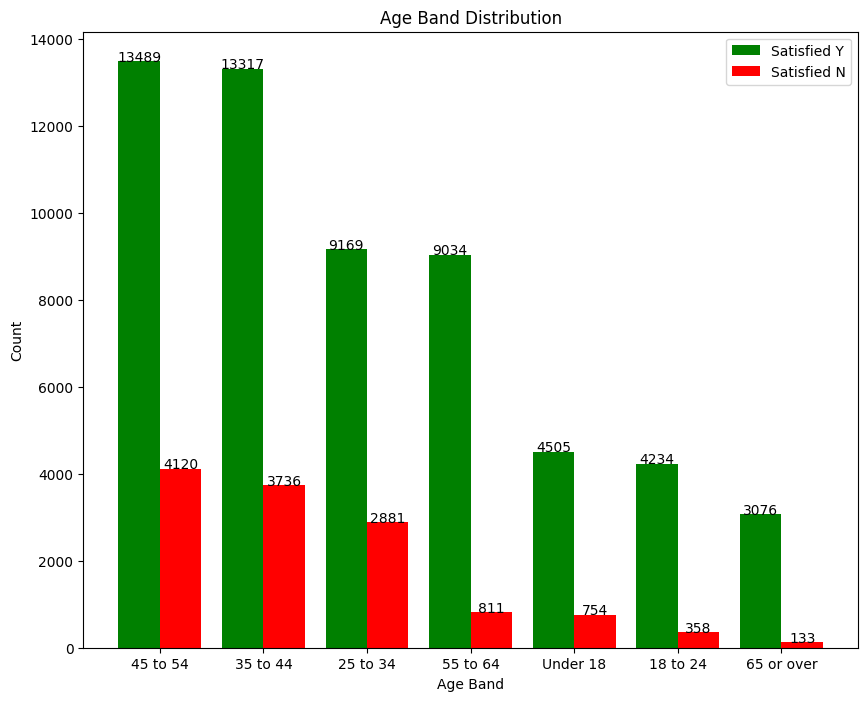

In [ ]:
# Importing file into Data Frame

import pandas as pd
import matplotlib.pyplot as plt # import the matplotlib library and assign it to the alias 'plt'
import numpy as np # import the numpy library and assign it to the alias 'np'


# Create a grouped bar chart for Age Band
plt.figure(figsize=(10,8))
column_name = 'Age Band'
satisfied_counts = data[data['Satisfied'] == 'Y'][column_name].value_counts()
not_satisfied_counts = data[data['Satisfied'] == 'N'][column_name].value_counts()
bar_width = 0.4
x = np.arange(len(satisfied_counts))
plt.bar(x - bar_width/2, satisfied_counts.values, bar_width, label='Satisfied Y',color='Green')
plt.bar(x + bar_width/2, not_satisfied_counts.values, bar_width, label='Satisfied N',color='red')
plt.title('Age Band Distribution')
plt.xlabel('Age Band')
plt.ylabel('Count')
plt.xticks(x, satisfied_counts.index)
plt.legend()

# Add values on top of each bar
for i, (satisfied, not_satisfied) in enumerate(zip(satisfied_counts.values, not_satisfied_counts.values)):
    plt.text(x[i] - bar_width/2, satisfied + 1, str(satisfied), ha='center', fontsize=10)
    plt.text(x[i] + bar_width/2, not_satisfied + 1, str(not_satisfied), ha='center', fontsize=10)

plt.show()

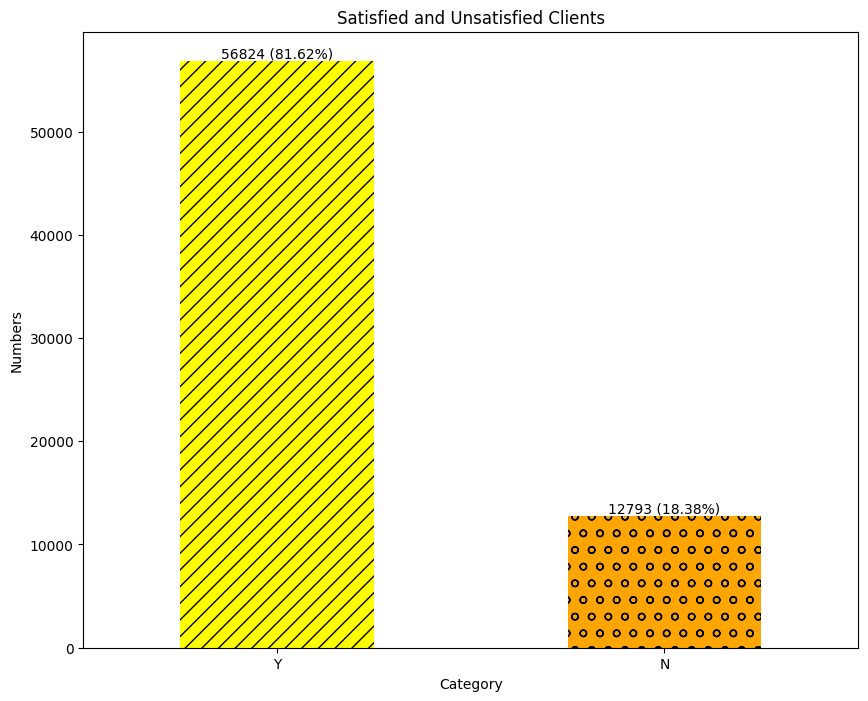

In [ ]:
# BAR Graps for Satisfied and Unsatisfied Clients

import matplotlib.pyplot as plt

counts = data['Satisfied'].value_counts()

# Calculate the percentages
percentages = (counts / len(data)) * 100

# Create a bar chart
plt.figure(figsize=(10, 8))
ax = counts.plot(kind='bar', color=['yellow', 'orange']) # Assign the return value of counts.plot() to ax
ax.patches[0].set_hatch('//')  # Add a hatch pattern to the first bar using ax.patches
ax.patches[1].set_hatch('o')
plt.title('Satisfied and Unsatisfied Clients')
plt.xlabel('Category')
plt.ylabel('Numbers')
plt.xticks(rotation=0)

# Annotate the bars with counts and percentages
for i, (count, percentage) in enumerate(zip(counts, percentages)):
    plt.annotate(f"{count} ({percentage:.2f}%)", (i, count), ha='center', va='bottom')

plt.show()

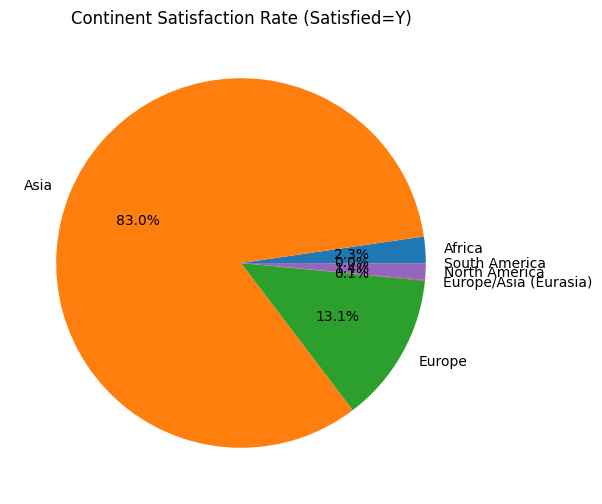

In [ ]:
# Creating Graph for Continent

# Filter data to only include rows where Satisfied is 'Y'
satisfied_data = data[data['Satisfied'] == 'Y']

# Aggregate data by continent
continent_data = satisfied_data.groupby('Continent')['Satisfied'].count().reset_index()

# Rename the count column to Satisfaction Rate
continent_data = continent_data.rename(columns={'Satisfied': 'Satisfaction Rate'})

# Calculate the percentage of satisfied customers for each continent
total_satisfied = len(satisfied_data)
continent_data['Satisfaction Rate'] = (continent_data['Satisfaction Rate'] / total_satisfied) * 100

# Create a pie chart
plt.figure(figsize=(8, 6))
# use continent_data['Satisfaction Rate'] and continent_data['Continent'] in the pie chart function
plt.pie(continent_data['Satisfaction Rate'], labels=continent_data['Continent'], autopct='%2.1f%%')
plt.title('Continent Satisfaction Rate (Satisfied=Y)')

plt.show()

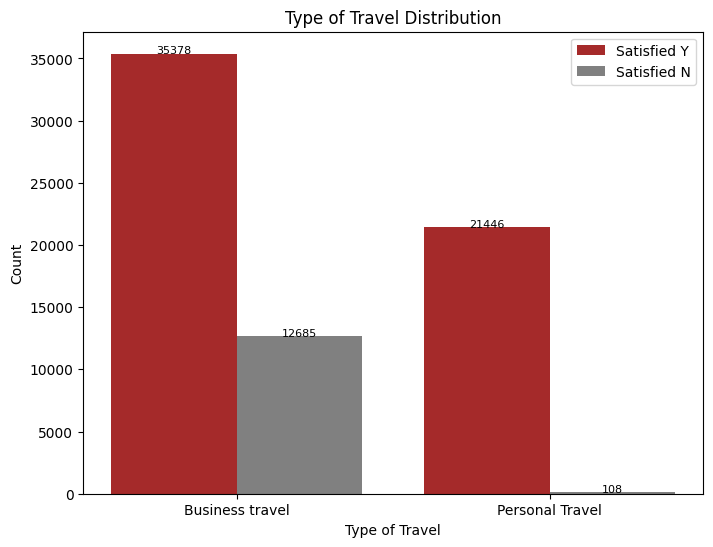

In [ ]:


# Creating a grouped bar chart for Type of Travel


plt.figure(figsize=(8,6))
column_name = 'Type of Travel'
satisfied_counts = data[data['Satisfied'] == 'Y'][column_name].value_counts()
not_satisfied_counts = data[data['Satisfied'] == 'N'][column_name].value_counts()
bar_width = 0.4
x = np.arange(len(satisfied_counts))
plt.bar(x - bar_width/2, satisfied_counts.values, bar_width,label='Satisfied Y',color='brown')
plt.bar(x + bar_width/2, not_satisfied_counts.values, bar_width,label='Satisfied N',color='grey')
plt.title('Type of Travel Distribution')
plt.xlabel('Type of Travel')
plt.ylabel('Count')
plt.xticks(x, satisfied_counts.index)
plt.legend()

# Add count values on top of each bar
for i, (satisfied, not_satisfied) in enumerate(zip(satisfied_counts.values, not_satisfied_counts.values)):
    plt.text(x[i] - bar_width/2, satisfied + 1, str(satisfied), ha='center', fontsize=8)
    plt.text(x[i] + bar_width/2, not_satisfied + 1, str(not_satisfied), ha='center', fontsize=8)

plt.show()

In [ ]:
# Getting the names of Categorical Columns so Hot encoding can be preocessed

# Print column names with categorical values
print(data.select_dtypes(include=['object']).columns)
# Save the list of column names with categorical values
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

Index(['Gender', 'Satisfied', 'Age Band', 'Type of Travel', 'Class',
       'Destination', 'Continent'],
      dtype='object')


In [ ]:
# Hot encoding for the categorical Varaibles, we droped teh Satisifed as it is the target Variable and we cannot have the two target varible to predict

# Use the previously generated list of categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# One-hot encode the categorical variables
data = pd.get_dummies(data, columns=categorical_columns, drop_first=False)

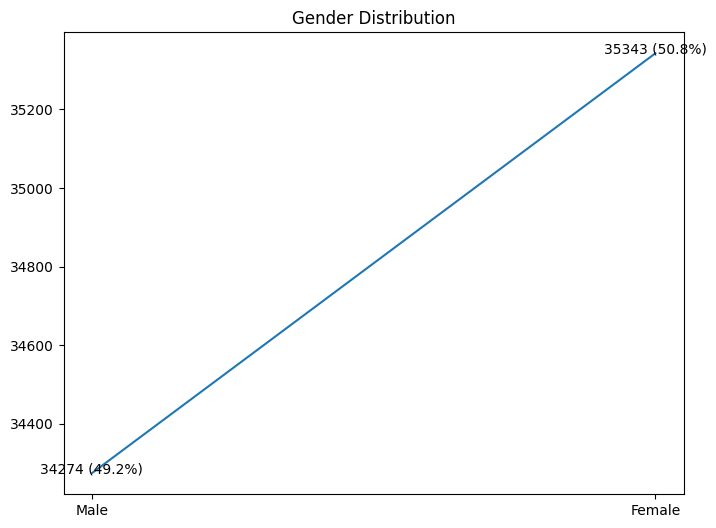

In [ ]:
# Visualize the distribution of Gender

plt.figure(figsize=(8,6))
column_names = ['Gender_Male', 'Gender_Female']
values = [0, 1]
labels = ['Male', 'Female']
value_counts = data[column_names].sum(axis=0).values
plt.plot(labels, value_counts)
plt.title('Gender Distribution')

# Add numbers and percentages to the bars
total = len(data)
for i, count in enumerate(value_counts):
    percentage = (count / total) * 100
    plt.annotate(f"{count} ({percentage:.1f}%)", xy=(i, count), ha='center')

plt.show()

In [ ]:
# Training and Prediction of Logistic Regression model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, mean_squared_error, mean_absolute_error, accuracy_score, precision_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer # Import the SimpleImputer

# Drop 'Ref' and 'id' columns
X

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Destination_Vatican City,Destination_Venezuela,Destination_Yemen,Destination_Åland,Continent_Africa,Continent_Asia,Continent_Europe,Continent_Europe/Asia (Eurasia),Continent_North America,Continent_South America
0,13,4760.0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,...,False,False,False,False,False,True,False,False,False,False
1,25,235.0,0.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,...,False,False,False,False,False,False,True,False,False,False
2,26,4760.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,...,False,False,False,False,False,True,False,False,False,False
3,25,560.0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,...,False,False,False,False,False,False,True,False,False,False
4,61,4760.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69612,48,4760.0,3.0,1.0,1.0,1.0,4.0,3.0,4.0,4.0,...,False,False,False,False,False,True,False,False,False,False
69613,40,1035.0,2.0,2.0,2.0,2.0,3.0,5.0,4.0,5.0,...,False,False,False,False,False,False,True,False,False,False
69614,19,4760.0,2.0,4.0,2.0,4.0,5.0,2.0,5.0,5.0,...,False,False,False,False,False,True,False,False,False,False
69615,48,4760.0,5.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0,...,False,False,False,False,False,True,False,False,False,False


--- Model Evaluation Metrics ---
Log Loss: 0.08462371954432737
MSE: 0.017092789428325195
MAE: 0.017092789428325195
Accuracy: 0.9829072105716748
Precision: 0.9867998263135042
F1 Score: 0.9896359519247517
Recall: 0.9924884269368504
--- Feature Importances ---


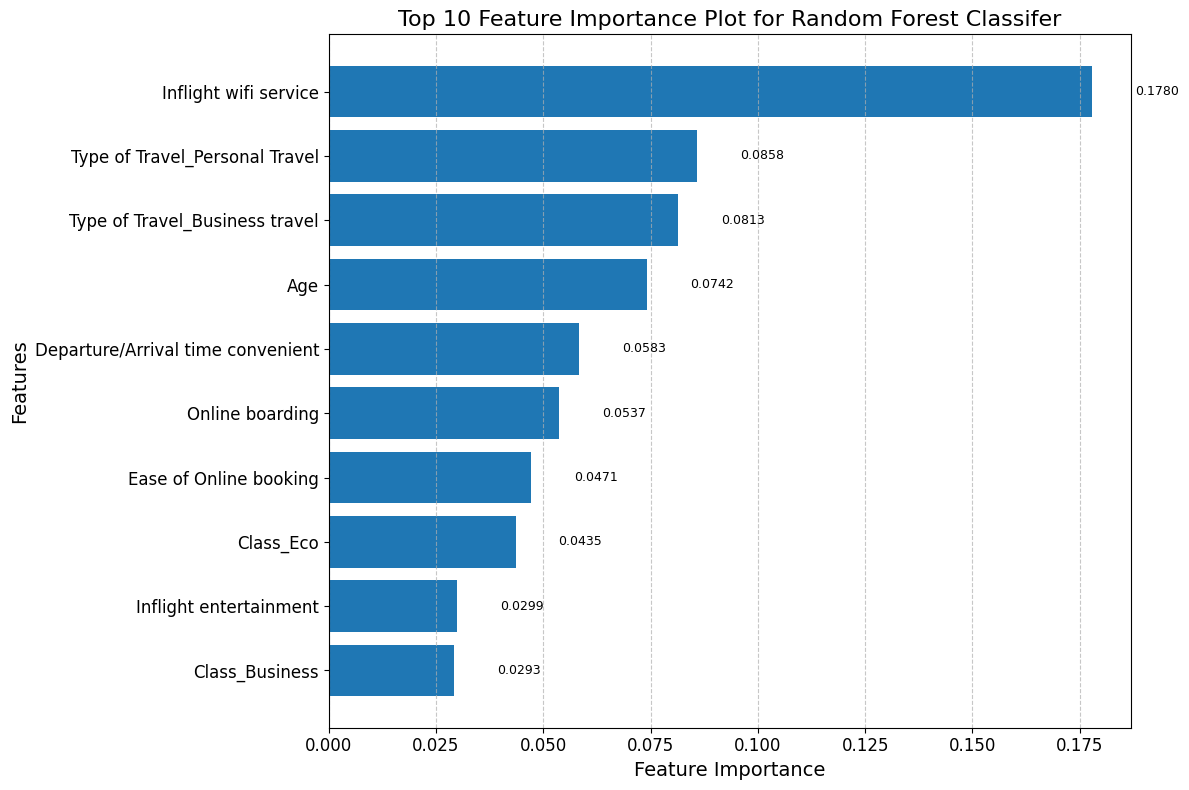

AUC Score: 0.9948432706839554


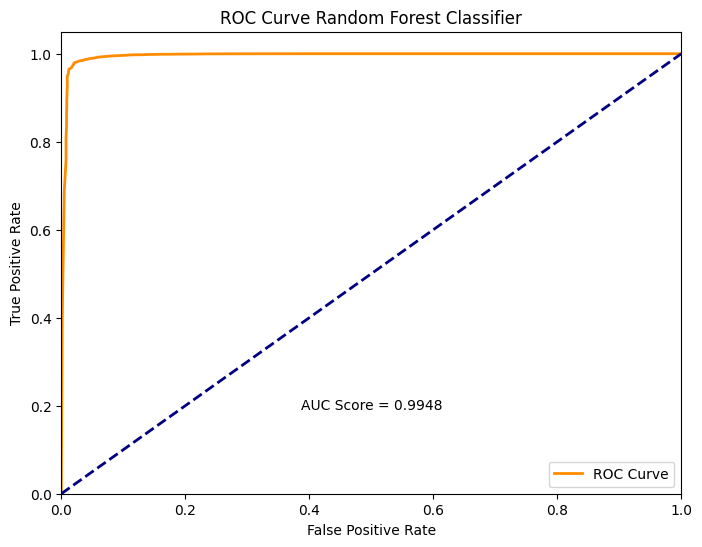

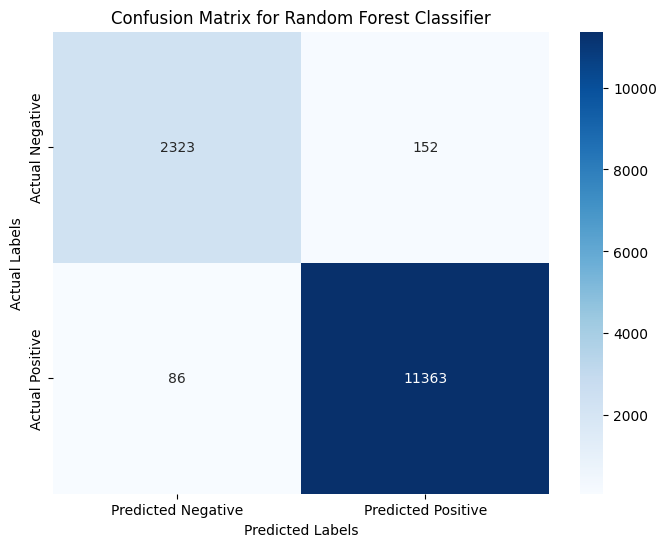

In [ ]:
# Training and Predicting Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Drop 'Ref' and 'id' columns
X = data.drop(columns=['Ref', 'id', 'Satisfied'])  # Features
y = data['Satisfied'].map({'Y': 1, 'N': 0})  # Convert target variable to binary (1 for 'Y', 0 for 'N')

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit the Random Forest Classifier model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions for the model
y_pred_rf = model_rf.predict(X_test)
y_pred_proba_rf = model_rf.predict_proba(X_test)[:, 1]

# Calculate and print loss functions for the model
log_loss_rf = log_loss(y_test, y_pred_proba_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

print(f'--- Model Evaluation Metrics ---')
print(f'Log Loss: {log_loss_rf}')
print(f'MSE: {mse_rf}')
print(f'MAE: {mae_rf}')
print(f'Accuracy: {accuracy_rf}')
print(f'Precision: {precision_rf}')
print(f'F1 Score: {f1_rf}')
print(f'Recall: {recall_rf}')

# Print the feature importances for the model
print(f'--- Feature Importances ---')
feature_importances_rf = model_rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for easier plotting
importances_df_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_rf
}).sort_values(by='Importance', ascending=False)

# Select the top 10 important features
top_n = 10
top_features_df_rf = importances_df_rf.head(top_n)

# Create a new figure with a larger height to avoid overlap
plt.figure(figsize=(12, 8))  # width, height in inches
bars = plt.barh(top_features_df_rf['Feature'], top_features_df_rf['Importance'])

# Add value labels with smaller font size
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.4f}',
             va='center', ha='left', fontsize=9)  # Adjust font size here

plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Top 10 Feature Importance Plot for Random Forest Classifer', fontsize=16)

# Adjust y-axis limits to remove extra space
plt.gca().invert_yaxis()  # Invert y-axis to show the highest importance at the top
plt.margins(y=0.05)  # Remove extra margin

# Adjust the font size for the x-axis and y-axis tick labels
plt.tick_params(axis='y', labelsize=12)  # Change 12 to desired font size
plt.tick_params(axis='x', labelsize=12)  # Change 12 to desired font size

# Add grid lines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout to fit labels
plt.tight_layout()

# Show the plot
plt.show()

# Calculate AUC score
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f'AUC Score: {auc_rf}')

# Plot ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Random Forest Classifier')
plt.legend(loc="lower right")
plt.text(0.5, 0.2, f'AUC Score = {auc_rf:.4f}', ha='center', va='center')
plt.show()

# Calculate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Create a DataFrame for easier plotting
cm_df_rf = pd.DataFrame(cm_rf, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_rf, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

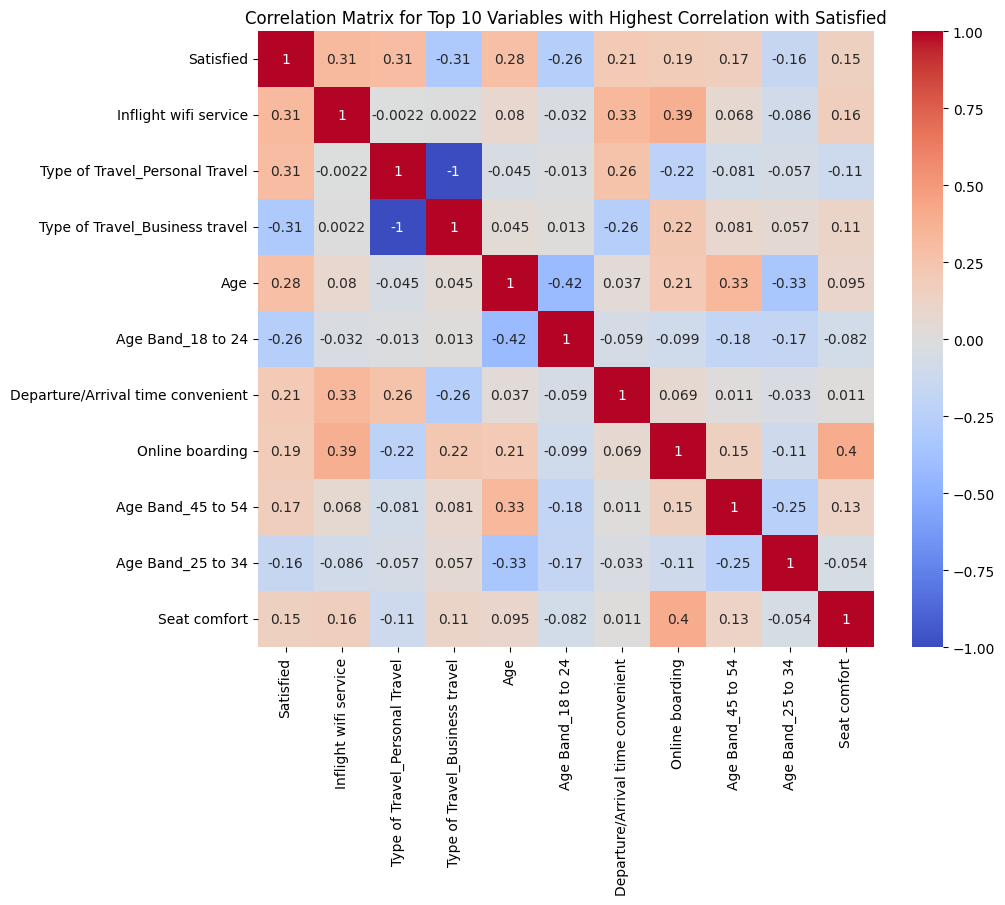

In [ ]:
#Heat Map

# One-hot encode the 'Satisfied' column
data['Satisfied'] = pd.get_dummies(data['Satisfied'], drop_first=True)

# Select all columns, including one-hot encoded columns
data_numeric = data.copy()

# Calculate the correlation matrix
corr_matrix = data_numeric.corr()

# Get the top 10 variables with the highest correlation with 'Satisfied'
top_10_vars = corr_matrix['Satisfied'].abs().sort_values(ascending=False).head(11).index

# Filter the correlation matrix to only include the top 10 variables
corr_matrix_top_10 = corr_matrix.loc[top_10_vars, top_10_vars]

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_top_10, annot=True, cmap='coolwarm', square=True, annot_kws={'fontsize': 10})
plt.title('Correlation Matrix for Top 10 Variables with Highest Correlation with Satisfied')
plt.show()